In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [6]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
print('rows:',df.shape[0], 'columns:',df.shape[1])

rows: 303 columns: 14


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [13]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace=True)
print('rows:',df.shape[0], 'columns:',df.shape[1])

rows: 302 columns: 14


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [17]:
list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SEX :[1 0] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CP :[3 2 1 0] 
THALL :[1 2 3 0] 
EXNG :[0 1] 


Number of people having sex as 0 are 96 and Number of people having sex as 1 are 206


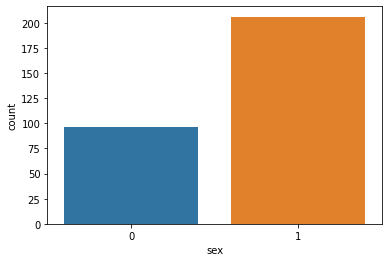

In [23]:
print(f'Number of people having sex as 0 are {df.sex.value_counts()[0]} and Number of people having sex as 1 are {df.sex.value_counts()[1]}')
p = sns.countplot(data=df, x="sex")
plt.show()

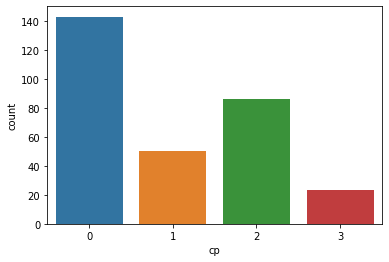

In [22]:
sns.countplot(x='cp', data=df)

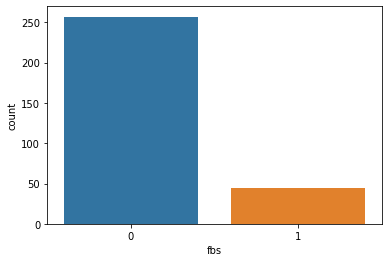

In [21]:
sns.countplot(x='fbs', data=df)

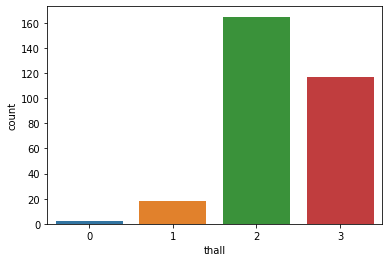

In [25]:
sns.countplot(x='thall', data=df)

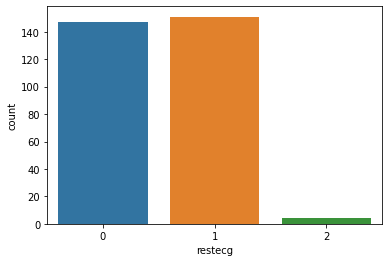

In [26]:
sns.countplot(x='restecg', data=df)

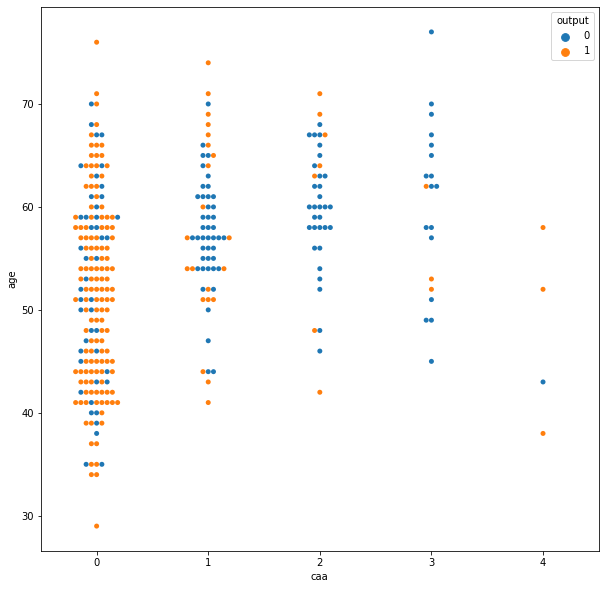

In [28]:
plt.figure(figsize = (10,10))
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'])

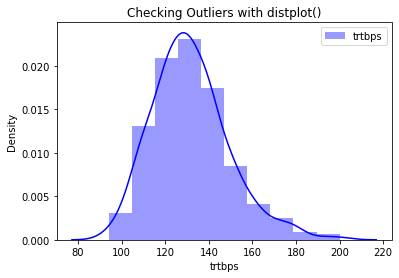

In [33]:
sns.color_palette("pastel")
plt.title('Checking Outliers with distplot()')
sns.distplot(df.trtbps, label='trtbps', kde=True, bins=10, color='b')
plt.legend()

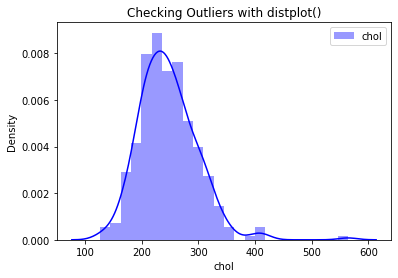

In [35]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df.chol, label='chol', kde=True, color='b')
plt.legend()

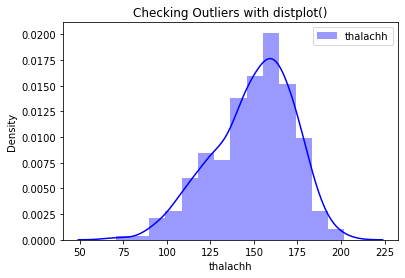

In [37]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df['thalachh'],label='thalachh', kde=True, color='b' )
plt.legend()

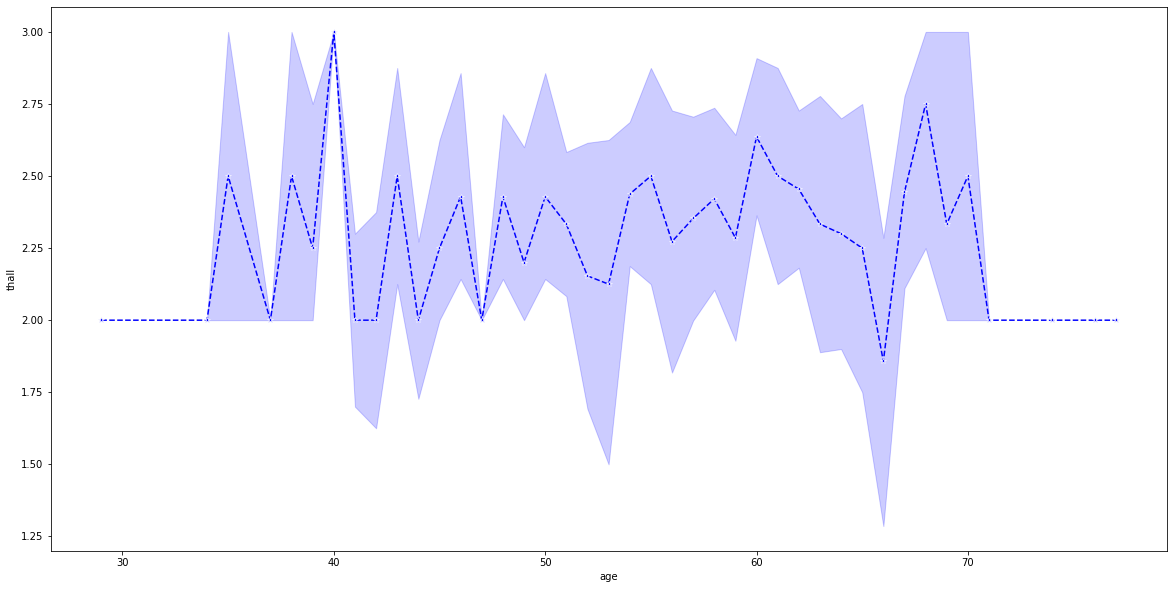

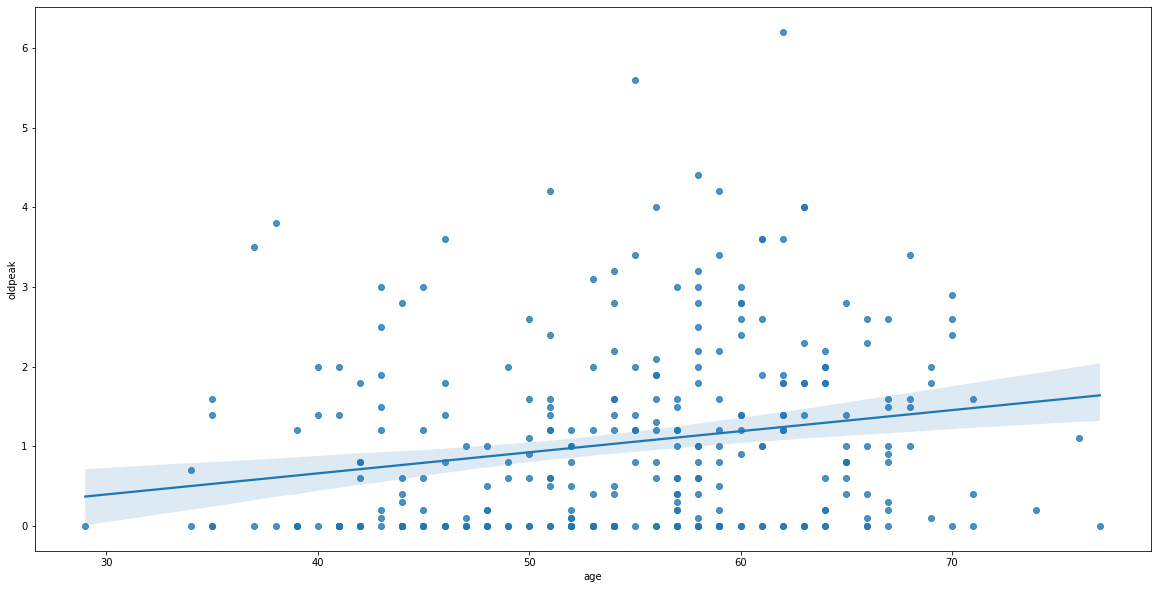

In [39]:
plt.figure(figsize=(20,10))
sns.lineplot(x = df['age'], y = df['thall'],marker = '*', linestyle = '--', color = 'b')

plt.figure(figsize = (20,10))
sns.regplot(x=df['age'],y=df['oldpeak'])

In [41]:
X = df.drop('output', axis = 1)
y = df['output']
df.reset_index(drop=True, inplace=True)

In [42]:
columns_to_scale = df.iloc[:,[0,3,4,7,9,]]
columns_to_scale

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
297,57,140,241,123,0.2
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
ss = StandardScaler()
scaled_values = ss.fit_transform(columns_to_scale)
scaled_values = pd.DataFrame(scaled_values, columns=columns_to_scale.columns)
scaled_values

,age,trtbps,chol,thalachh,oldpeak
0,0.949794,0.764066,-0.261285,0.018826,1.084022
1,-1.928548,-0.091401,0.067741,1.636979,2.118926
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608
4,0.285561,-0.661712,2.080602,0.587366,-0.382092
...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360
299,1.503322,0.707035,-1.035462,-0.374779,2.032684
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360


In [45]:
scaled_df = pd.concat([scaled_values,df.iloc[:,[1,2,5,6,8,10,11,12,13]]],axis=1)
scaled_df

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,3,1,0,0,0,0,1,1
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,2,0,1,0,0,0,2,1
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0,1,0,0,0,2,0,2,1
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,1,0,2,0,2,1
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,0.478910,-0.106449,-1.161988,-0.727060,0,0,0,1,1,1,0,3,0
298,-1.042904,-1.232023,0.338703,-0.768384,0.135360,1,3,0,1,0,1,0,3,0
299,1.503322,0.707035,-1.035462,-0.374779,2.032684,1,0,1,1,0,1,2,3,0
300,0.285561,-0.091401,-2.235438,-1.511859,0.135360,1,0,0,1,1,1,1,3,0


In [48]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(random_state=9), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), xgb.XGBClassifier()]
models = dict(zip(key,value))
predicted =[]

In [49]:
X = scaled_df.drop('output', axis = 1)
y = scaled_df['output']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8360655737704918
KNeighborsClassifier 0.8688524590163934
SVC 0.8852459016393442
DecisionTreeClassifier 0.7868852459016393
RandomForestClassifier 0.8852459016393442
GradientBoostingClassifier 0.8524590163934426
AdaBoostClassifier 0.7868852459016393
XGBClassifier 0.8524590163934426


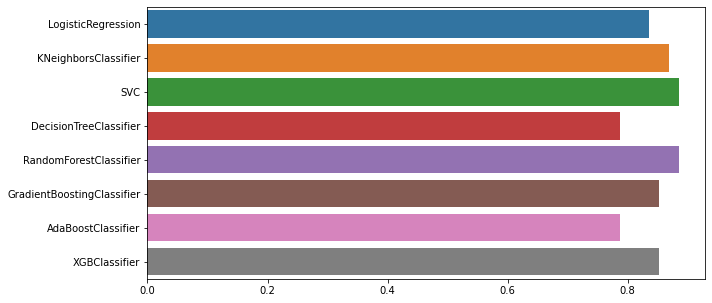

In [52]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key)

In [53]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,100,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)    
    model_lr_rs = lr.fit(X_train, y_train.values.ravel())
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

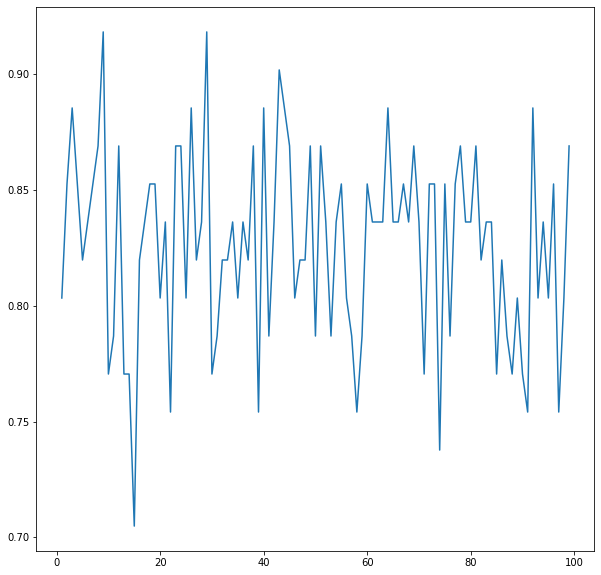

In [54]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc)

In [55]:
for i in range(len(rs)):
    print(rs[i],acc[i])

1 0.8032786885245902
2 0.8524590163934426
3 0.8852459016393442
4 0.8524590163934426
5 0.819672131147541
6 0.8360655737704918
7 0.8524590163934426
8 0.8688524590163934
9 0.9180327868852459
10 0.7704918032786885
11 0.7868852459016393
12 0.8688524590163934
13 0.7704918032786885
14 0.7704918032786885
15 0.7049180327868853
16 0.819672131147541
17 0.8360655737704918
18 0.8524590163934426
19 0.8524590163934426
20 0.8032786885245902
21 0.8360655737704918
22 0.7540983606557377
23 0.8688524590163934
24 0.8688524590163934
25 0.8032786885245902
26 0.8852459016393442
27 0.819672131147541
28 0.8360655737704918
29 0.9180327868852459
30 0.7704918032786885
31 0.7868852459016393
32 0.819672131147541
33 0.819672131147541
34 0.8360655737704918
35 0.8032786885245902
36 0.8360655737704918
37 0.819672131147541
38 0.8688524590163934
39 0.7540983606557377
40 0.8852459016393442
41 0.7868852459016393
42 0.8360655737704918
43 0.9016393442622951
44 0.8852459016393442
45 0.8688524590163934
46 0.8032786885245902
47 

**So accuracy the best prediction for Heart Attack chances is 91.8. But with different random state we should rely more on average of all accuracies.**

**Conclusion:**


*   Numeric Variables - No outliers were found!

*   High Blood Pressure, High Cholestrol and High Heart Rate leads to high chance of heart attack.

*   In the count of target showed up that we have more chance of heart attack details.

*   Age from 40-60 years have the high chance of heart attack.

*   Male gender has more chance of heart attack compared to female ones.

*   Highly Correlated factors in this dataset are :

   *   Age and trtbps (blood pressure rate)

   *   Age and chol (cholestrol level)